<a href="https://colab.research.google.com/github/AdityaPunetha/TensorFlow-CIFAR10-GAN/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [1]:
from numpy import zeros,ones
from numpy.random import randn, randint
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

%matplotlib inline

# Load data

In [2]:
(trainX, trainy), (testX,testy) = load_data()

170508288/170498071 [==============================] - 2s 0us/step


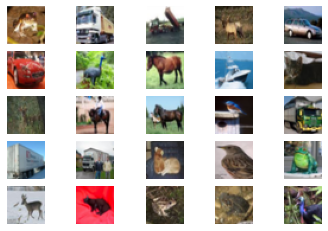

In [3]:
for i in range(25):
	plt.subplot(5, 5, 1 + i)
	plt.axis('off')
	plt.imshow(trainX[i])
plt.show()

In [4]:
trainX[0].shape

(32, 32, 3)

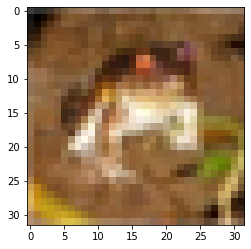

In [6]:
plt.imshow(trainX[0])

In [49]:
def denorm(x):
  out = (x+1)/2
  return out

# Define Discriminator

In [8]:
in_shape = (32, 32, 3)

discriminator = Sequential()

discriminator.add(layers.Conv2D(128, (3,3), strides = (2,2), padding = "same", input_shape = in_shape))
discriminator.add(layers.LeakyReLU(alpha = 0.2))

discriminator.add(layers.Conv2D(128, (3,3), strides = (2,2), padding = "same"))
discriminator.add(layers.LeakyReLU(alpha = 0.2))

discriminator.add(layers.Flatten())
discriminator.add(layers.Dropout(0.4))
discriminator.add(layers.Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.0002, beta_1=0.5)
discriminator.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['accuracy'])

In [9]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1)                 8

# Define Generator

In [2]:
latent_size = 100

In [88]:
generator = Sequential()

n_nodes = 128 * 8 * 8
generator.add(layers.Dense(n_nodes, input_dim = latent_size))
generator.add(layers.ReLU())
generator.add(layers.Reshape((8,8,128)))

generator.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
generator.add(layers.ReLU())

generator.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
generator.add(layers.ReLU())

generator.add(layers.Conv2D(3, (8,8), activation='tanh', padding='same'))


In [89]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8192)              827392    
                                                                 
 re_lu_6 (ReLU)              (None, 8192)              0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                                       
                                                                 
 re_lu_7 (ReLU)              (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                            

In [90]:
y = generator(randn(1,latent_size))

In [91]:
gen_image = y

In [93]:
gen_image = gen_image.numpy()

In [58]:
gen_image = denorm(gen_image)

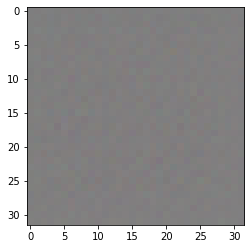

In [96]:
plt.imshow(gen_image[0])